# **Harrison Gietz - Math 4058 Gibbs Sampling**

This code provides an empirical demonstration of the Gibbs iteration/sampling process, for a **bivariate normal distribution.**

- Gibbs Sampling (or a Gibbs sampler) is a special case of the metropolis hastings algorithm. Typically, Gibbs Sampling would be used in order sample from a probability distribution of multiple variables that might otherwise be hard to specify. The main idea behind a Gibbs sampler is that, for a multivariate distribution, it's easier to sample from conditional distribution than it is to sample from the joint distribution.
- To demonstrate how Gibb's Sampling works: let's say we have two events A and B and we want to sample from their joint probability distribution P(A,B). We start by initializing A and B to some values, $A_0, B_0$ (arbitrary). Then we alternate between sampling from P(A|B) and P(B|A), where where the new values of A and B are replaced by each sample. I.e the first iteration would look like $A_1 = P(A|B_0)$, followed by finding B_1 from $B_1 = P(B|A_1)$, $A_2 = P(A|B_1)$, and so on. We repeat this process many times and collect samples of A and B; in the long run, it can be shown that these probabilities converge to P(A,B).
- I expected other students to go into the theoretical reasons why Gibbs sampling converges to the desired distribution, but I wanted to demonstrate this empirically. I wrote this code in python to do this; the code provides an example of a Gibbs algorithm with a 2 Dimensional bivariate normal distribution:

The distribution is defined by:	

$$ Z = (X,Y) = BVN\Bigg(\begin{pmatrix} \mu_X \\ \mu_Y  \end{pmatrix}, \begin{pmatrix}
   \sigma_X^2 & \rho\sigma_Y\sigma_X \\
   \rho\sigma_Y\sigma_X & \sigma_Y^2 
\end{pmatrix}\Bigg)$$

It can be derived that $$Y|(X=x)\sim N\left(\mu_Y+\rho \dfrac{\sigma_Y}{\sigma_X}(X-\mu_X),\quad \sigma^2_Y(1-\rho^2)\right)$$

Note: This is the same (but X and Y swapped) for the calculation of 
$$X \ | \ Y=y$$ 

(see these two links here for details of the distribution or this derivation: 

https://online.stat.psu.edu/stat414/lesson/21/21.1

https://www2.stat.duke.edu/courses/Spring12/sta104.1/Lectures/Lec22.pdf )


**To run the Code below:**

Press shift+enter to run each cell and see the results

Some comments are given after each "#" that descrbe and discuss the code

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
from IPython.display import clear_output
import time

In [ ]:
# Here, the goal is to demonstrate gibbs sampling
# Over the long run, these conditional distribution samples will converge to the true distribution

# To be able to visualize this, we demonstrate with a 2D distribution; this way, it is easy to visualize what is happening.
# one simple example is the bivariate normal (gaussian) distribution

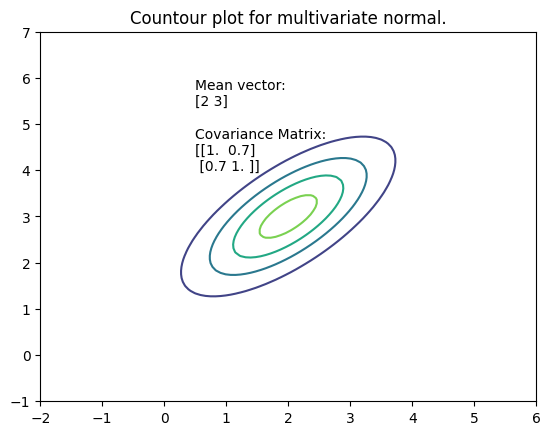

In [131]:
# First: visualizing the true bivariate defined as follows

# mean vector and covariance matrix
mu = np.array([2, 3])
var_x = 1
var_y = 1
rho = 0.7
cov = np.array([[var_x**2, rho*var_y*var_x], [rho*var_y*var_x, var_y**2]])

std = 3 #the amount of scale to the contour plot of the multivariate normal
# i.e. if std were 3, then the plot willl cover 3 standard deviations of the data (almost all points generated)

# Define the x and y ranges
x = np.linspace(mu[0] - 1 - std*var_x**2, mu[0] + 1 + std*var_x**2, 100)
y = np.linspace(mu[1] - 1 - std*var_y**2, mu[1] + 1 + std*var_y**2, 100)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# Evaluate the bivariate normal distribution at each point on the grid
Z = multivariate_normal.pdf(pos, mean=mu, cov=cov)

# Plot the contour lines
plt.figure()
plt.contour(X, Y, Z, levels = 4)
plt.title('Countour plot for multivariate normal.')
plt.text(0.5,4,f'Mean vector: \n{mu}\n\nCovariance Matrix: \n{cov}')
plt.show()

**Actually Running the Gibbs iterations, below:**

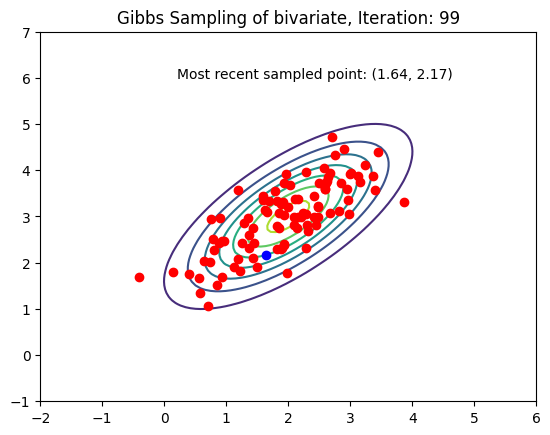

In [136]:
# Now, the goal is to run a gibbs iteration and see if the results seem to converge (roughly) to the multivariate distribution
# we run 100 iterations; after a while you can see the points begin to converge to the distribution roughly

# Initialize the list of points
points = []

# initialize the value of y_0, which we will use to draw the first conditional value
# notice that even if the inital values are set to 0,0 , the sampling will still eventually converge to the gibbs distribution
# that is why -- in practice -- it helps to leave out the first few samples when using Gibbs iteration 
# (since the initial points are arbitrary so it might take a while to get the samples to converge to the actual distribution)
y = 0

for i in range(100):
  # Draw a sample from the conditional normal distribution, depending on what iteration we are on

  # draw from X|Y=y
  x = np.random.normal(mu[0] + rho*(var_x/var_y)*(y - mu[1]), (var_x**2)*(1-rho**2))
  # draw from Y|X=x given the new x
  y = np.random.normal(mu[1] + rho*(var_y/var_x)*(x - mu[0]), (var_y**2)*(1-rho**2))

  sample = [x,y]
  # Add the sample to the list of past points
  points.append(sample)

  # Plot all past points
  plt.contour(X, Y, multivariate_normal.pdf(pos, mean=mu, cov=cov))
  plt.plot([p[0] for p in points[:-1]], [p[1] for p in points[:-1]], 'ro')
  plt.plot(points[-1][0], points[-1][1], 'bo')
  plt.title(f'Gibbs Sampling of bivariate, Iteration: {i}')
  plt.text(0.2,6, f'Most recent sampled point: ({round(sample[0],2)}, {round(sample[1],2)})')

  # Update the plot
  plt.show()
  time.sleep(0.05)

  clear_output(wait=True)

**Sampling from a built-in library for multivariate normal, to see how it compares: (not a gibbs process)**

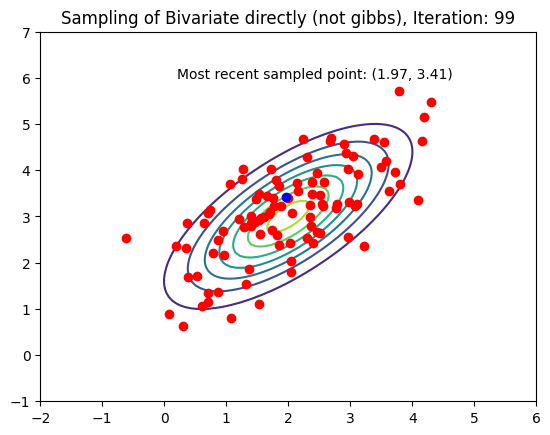

In [137]:
points = []

for i in range(100):
  # Draw a sample from the multivariate normal distribution
  sample = np.random.multivariate_normal(mu, cov)

  # Add the sample to the list of past points
  points.append(sample)

  # Plot all past points in red
  plt.contour(X, Y, multivariate_normal.pdf(pos, mean=mu, cov=cov))
  plt.plot([p[0] for p in points[:-1]], [p[1] for p in points[:-1]], 'ro')

  # Plot the most recent point in blue
  plt.plot(points[-1][0], points[-1][1], 'bo')

  # Set the title of the plot
  plt.title(f'Sampling of Bivariate directly (not gibbs), Iteration: {i}')
  plt.text(0.2,6, f'Most recent sampled point: ({round(sample[0],2)}, {round(sample[1],2)})')

  # Update the plot
  plt.show()
  time.sleep(0.05)
  clear_output(wait=True)


As can be seen, the value sgenerated by the Gibbs process appear to match those from the built-in methods for generating multivariate values.
One can infer that with enough samples, these distributions would look closer and closer to one another.